In [ ]:
# Import necessary libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn import metrics
import nltk
from nltk.stem import PorterStemmer
nltk.download('punkt')  # Download the required dataset for tokenization


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Load the 20 Newsgroups dataset and remove headers, footers, and quotes
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

In [ ]:
# Tokenization, stemming, and normalization
stemmer = PorterStemmer()
normalized_text = [' '.join([stemmer.stem(word.lower()) for word in nltk.word_tokenize(text)]) for text in newsgroups.data]


In [ ]:
print(normalized_text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(normalized_text)
y = newsgroups.target

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train)

  (0, 612)	0.20631160511800054
  (0, 260)	0.21685054201354217
  (0, 535)	0.339695468323103
  (0, 553)	0.1561504720747878
  (0, 543)	0.3123662102528663
  (0, 981)	0.3158989866487395
  (0, 239)	0.16556903668583486
  (0, 216)	0.3333650621488756
  (0, 422)	0.3289678964071237
  (0, 72)	0.19357351236498738
  (0, 274)	0.19804651623077338
  (0, 270)	0.1514312669226887
  (0, 954)	0.1376601410595186
  (0, 805)	0.16882483577974217
  (0, 776)	0.13513852924214223
  (0, 671)	0.1511693197202127
  (0, 908)	0.1511038911596793
  (0, 955)	0.12956809938828037
  (0, 254)	0.18909963649019362
  (0, 498)	0.10760914272089893
  (0, 744)	0.17883622726950155
  (0, 694)	0.13918678447785499
  (1, 192)	0.2489091152938963
  (1, 189)	0.2422164047238867
  (1, 51)	0.5344064245347159
  :	:
  (15075, 739)	0.06293092283983617
  (15075, 927)	0.08605229912062949
  (15075, 162)	0.06474206287404076
  (15075, 567)	0.25019989168077356
  (15075, 990)	0.06188734561433976
  (15075, 953)	0.2301338830877742
  (15075, 640)	0.043091285

In [ ]:
# Train and Test the Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = metrics.accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.5809018567639257


In [ ]:
# Train and Test the Rocchio Classifier
rocchio_classifier = NearestCentroid()
rocchio_classifier.fit(X_train, y_train)
rocchio_predictions = rocchio_classifier.predict(X_test)
rocchio_accuracy = metrics.accuracy_score(y_test, rocchio_predictions)
print("Rocchio Accuracy:", rocchio_accuracy)

Rocchio Accuracy: 0.5376657824933687


In [ ]:
# Train and Test the k-Nearest Neighbor (k-NN) Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust k as needed
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = metrics.accuracy_score(y_test, knn_predictions)
print("k-NN Accuracy:", knn_accuracy)

k-NN Accuracy: 0.19283819628647214


In [ ]:
from sklearn.metrics import f1_score

# Calculate F1-scores for each classifier
nb_f1 = f1_score(y_test, nb_predictions, average='weighted')
rocchio_f1 = f1_score(y_test, rocchio_predictions, average='weighted')
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')

# Print the F1-scores
print("Naive Bayes F1-score:", nb_f1)
print("Rocchio F1-score:", rocchio_f1)
print("k-NN F1-score:", knn_f1)

Naive Bayes F1-score: 0.5734506390013268
Rocchio F1-score: 0.5528499670329711
k-NN F1-score: 0.2448735718815814


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
classifiers = ['Naive Bayes', 'Rocchio', 'K-Nearest Neighbor']
f_scores = [nb_f1, rocchio_f1, knn_f1]


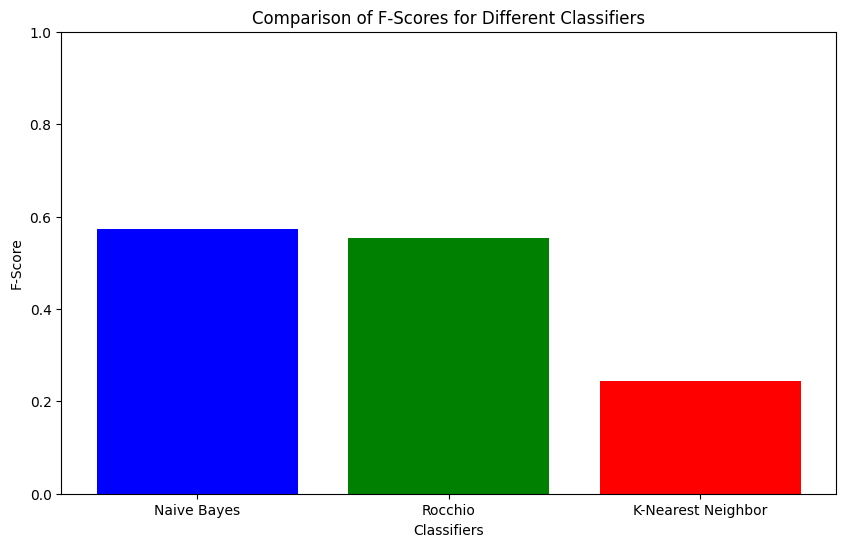

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(classifiers, f_scores, color=['blue', 'green', 'red'])
plt.xlabel('Classifiers')
plt.ylabel('F-Score')
plt.title('Comparison of F-Scores for Different Classifiers')
plt.ylim(0, 1)  # Set the y-axis limits as needed
plt.show()
